## Part 7
실시간 비명 감지 시스템 with Pytorch Project

In [2]:
!pip install librosa


In [3]:
!pip install sounddevice

In [4]:
import librosa
from matplotlib import pyplot as plt
import sounddevice as sd

In [5]:
example_file_path = librosa.ex('trumpet')
print(f'파일 위치: {example_file_path}')

파일 위치: C:\Users\JaeJunChoi\AppData\Local\librosa\librosa\Cache\sorohanro_-_solo-trumpet-06.ogg


C:\Users\JaeJunChoi\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


# Amplitude 벡터 생성
-> y는 소리 벡터, sr은 Sampling Rate

-> y = 신호 진폭 값, sr = 초당 신호 값 개수

In [7]:
y, sr = librosa.load(example_file_path)

In [8]:
sd.play(y)

In [9]:
print(f'y: {y}\nsampling rate : {sr}')

y: [-1.40682457e-03 -4.46077698e-04 -4.10981564e-04 ...  7.96230779e-06
 -3.04169989e-05  1.27650665e-05]
sampling rate : 22050


# 1초에 22,050개의 Amplitude가 존재

In [11]:
print(f'y는 {len(y)} 길이 벡터이다.')

y는 117601 길이 벡터이다.


In [12]:
print(f'y의 벡터 값 20개 출력 = {y[:20]}')

y의 벡터 값 20개 출력 = [-1.4068246e-03 -4.4607770e-04 -4.1098156e-04  9.9922603e-05
  4.3147978e-05 -1.7485370e-04 -3.6783644e-04  1.4553108e-04
  5.0557696e-04  1.4929977e-03  1.8555233e-03  9.2913560e-04
 -4.0743421e-04 -2.0390274e-03 -1.2686799e-03 -5.3472869e-04
  8.9941692e-04  9.7593718e-04  1.0020013e-03 -1.2960774e-03]


# y가 몇 초 데이터인가
= len(y) / sampling rate

In [14]:
print(f'y는 {len(y) / sr} 초이다.')

y는 5.333378684807256 초이다.


In [15]:
x = [i / sr for i in range(len(y))]

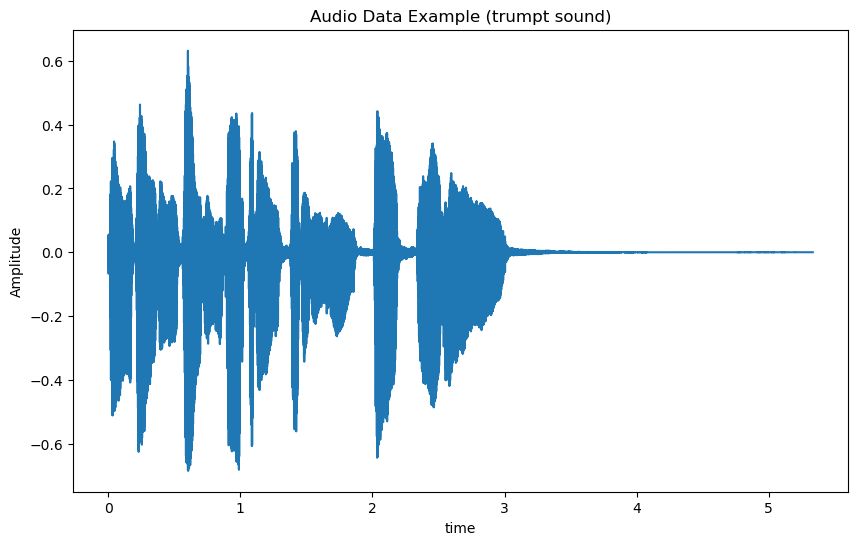

In [16]:
plt.figure(figsize=(10,6))
plt.plot(x,y) #x=시간(초), y=진폭
plt.title('Audio Data Example (trumpt sound)')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.show()

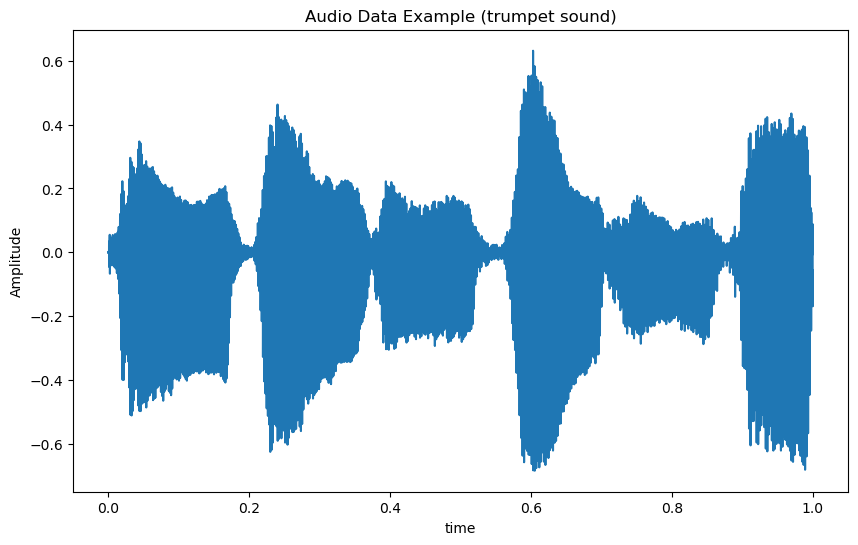

In [17]:
# 1초까지 시각화 확대 작업

import numpy as np

# y 데이터의 최소 및 최대 값을 계산
y_min, y_max = np.min(y[:sr]), np.max(y[:sr])

plt.figure(figsize=(10, 6))
plt.plot(x[:sr], y[:sr])
plt.title('Audio Data Example (trumpet sound)')
plt.xlabel('time')
plt.ylabel('Amplitude')

# y축 범위를 데이터의 실제 최소 및 최대 값으로 설정


plt.show()


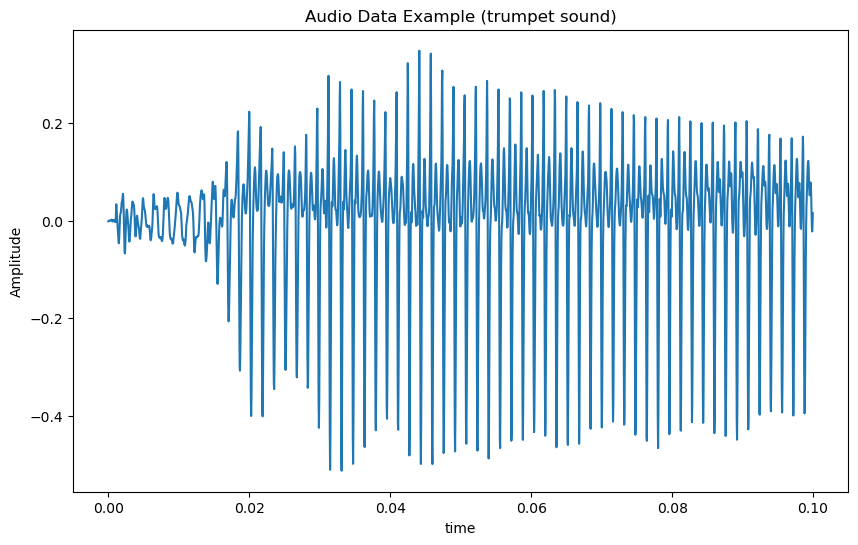

In [18]:
# 0.1초까지 시각화 확대 작업

import numpy as np

# y 데이터의 최소 및 최대 값을 계산
y_min, y_max = np.min(y[:sr]), np.max(y[:sr])


# // -> 좌항을 우항으로 나눔 + 정수형
plt.figure(figsize=(10, 6))
plt.plot(x[:sr // 10], y[:sr // 10])
plt.title('Audio Data Example (trumpet sound)')
plt.xlabel('time')
plt.ylabel('Amplitude')

# y축 범위를 데이터의 실제 최소 및 최대 값으로 설정


plt.show()


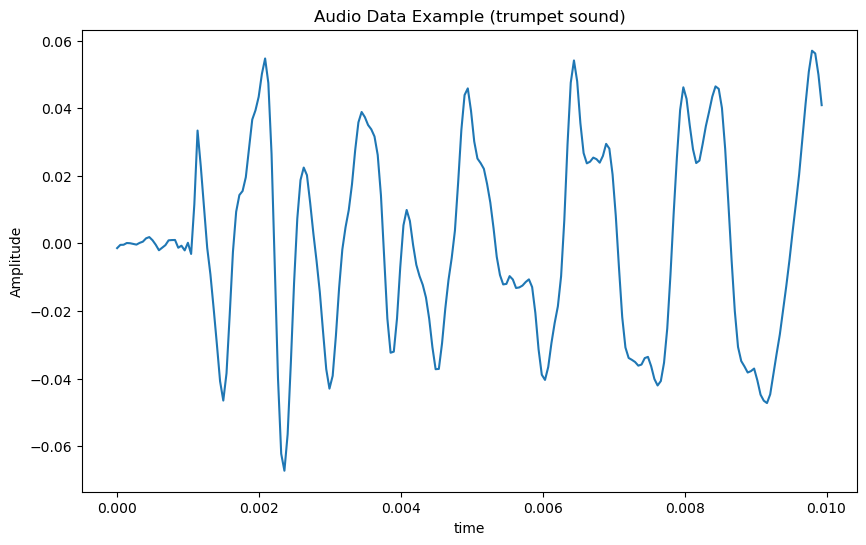

In [19]:
# 0.1초까지 시각화 확대 작업

import numpy as np

# y 데이터의 최소 및 최대 값을 계산
y_min, y_max = np.min(y[:sr]), np.max(y[:sr])


# // -> 좌항을 우항으로 나눔 + 정수형
plt.figure(figsize=(10, 6))
plt.plot(x[:sr // 100], y[:sr // 100])
plt.title('Audio Data Example (trumpet sound)')
plt.xlabel('time')
plt.ylabel('Amplitude')

# y축 범위를 데이터의 실제 최소 및 최대 값으로 설정


plt.show()


In [20]:
# 데이터 불러오기
import pandas as pd
import librosa

example_audio_path = '비명 감지 시스템 data/꿩+klankbeeld.wav'
example_label_path = '비명 감지 시스템 data/꿩+klankbeeld.txt'

In [21]:
# 소리 데이터 로드하기
example_audio, example_sr = librosa.load(example_audio_path)
print(
        f'audio 벡터 길이: {len(example_audio)}\
        \naudio 파일 길이: {len(example_audio) / example_sr} 초')

audio 벡터 길이: 85604        
audio 파일 길이: 3.882267573696145 초


In [22]:
# 레이블 데이터 로드
import pandas as pd


example_label = pd.read_csv(example_label_path, sep='\t', names=['start(s)', 'end(s)', 'label'])

print(f'label :\
        \n{example_label}')


label :        
   start(s)    end(s)  label
0   0.00000  1.191226      0
1   1.33714  3.210092      0


In [51]:
#frame_size & stride 선언
frame_size = 1
stride = 0.2

idx = example_label['end(s)'] - example_label['start(s)'] >= frame_size

example_label = example_label[idx]  # 1초 이상 레이블 구간만 선택

In [55]:
# 레이블별 frame 개수 & 총 Frame 개수 출력

each_n_frames = (np.floor(
                            (
                                (
                                    (example_label['end(s)'] - example_label['start(s)']) 
                    - frame_size) 
                    / stride) 
                      + 1)
                ).astype(int).values

In [59]:
total_n_frames = sum(each_n_frames)

print(f'각각의 구간마다 프레임 개수: {each_n_frames}') # 한 파일내 각 레이블 구간의 Frame 개수
print(f'총 구간의 프레임 개수: {total_n_frames}') # 한 파일 내의 총 Frame 개수

각각의 구간마다 프레임 개수: [1 5]
총 구간의 프레임 개수: 6


In [87]:
# frame 벡터 & Target 벡터를 담을 빈 벡터 생성
frame_vector = np.zeros((int(total_n_frames), frame_size * example_sr))

target_vector = np.zeros((int(total_n_frames)))

In [89]:
print(f'frame_vectors의 shape : {frame_vector.shape}\
        \n target_vectors의 shape : {target_vector.shape}'
     )

frame_vectors의 shape : (6, 22050)        
 target_vectors의 shape : (6,)


In [91]:
for i in range(len(frame_vector)):
    print(f'{i}-th frame vector[:5] : {frame_vector[i][:5]}')

print(f'target vector: {target_vector}')

0-th frame vector[:5] : [0. 0. 0. 0. 0.]
1-th frame vector[:5] : [0. 0. 0. 0. 0.]
2-th frame vector[:5] : [0. 0. 0. 0. 0.]
3-th frame vector[:5] : [0. 0. 0. 0. 0.]
4-th frame vector[:5] : [0. 0. 0. 0. 0.]
5-th frame vector[:5] : [0. 0. 0. 0. 0.]
target vector: [0. 0. 0. 0. 0. 0.]


In [97]:
# frame 벡터 & target 벡터 출력

current_idx = 0

for i, (start, end, y) in example_label.iterrows():
    for j in range(each_n_frames[i]):
        start_idx = int((start + j * stride) * example_sr)
        end_idx = start_idx + frame_size * example_sr
        frame_vector[current_idx] = example_audio[start_idx:end_idx]
        target_vector[current_idx] = y
        current_idx += 1


print(
    f'frame_vectors의 shape : {frame_vector.shape}\
    \ntarget_vectors의 shape : {target_vector.shape}'
)

frame_vectors의 shape : (6, 22050)    
target_vectors의 shape : (6,)


In [99]:
for i in range(len(frame_vector)):
    print(f'{i}-th frame vector[:5] : {frame_vector[i][:5]}')
print(f'target_vectors : {target_vector}')

0-th frame vector[:5] : [-0.00256151  0.0010708   0.00017002 -0.00688909 -0.00465812]
1-th frame vector[:5] : [0.00462483 0.00473269 0.00504279 0.00414063 0.00216461]
2-th frame vector[:5] : [0.01052451 0.01408348 0.01581073 0.0122289  0.0089476 ]
3-th frame vector[:5] : [-0.00730671 -0.01085784 -0.00840317 -0.01000291 -0.01858185]
4-th frame vector[:5] : [0.05640003 0.06169597 0.05148281 0.03098896 0.01662071]
5-th frame vector[:5] : [-0.00199349 -0.00298101  0.00014412  0.00137775 -0.00182539]
target_vectors : [0. 0. 0. 0. 0. 0.]
